The accuracy score of K-Means (unmatched): 0.1
The accuracy score of K-Means (matched): 0.9
The Confusion matrix of K-Means:
 [[4 0 0]
 [0 3 0]
 [0 1 2]]
The accuracy score of EM (unmatched): 0.1
The accuracy score of EM (matched): 0.9
The Confusion matrix of EM:
 [[4 0 0]
 [0 3 0]
 [0 1 2]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


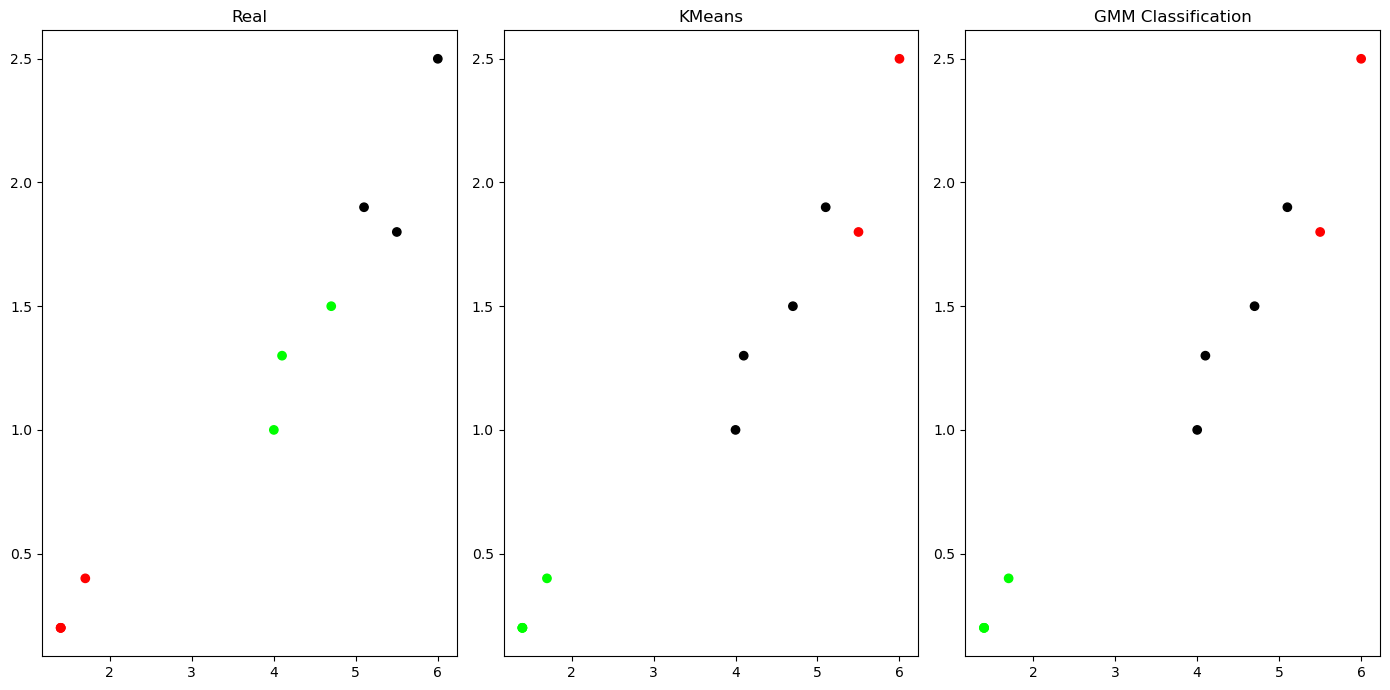

In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
dataset = pd.read_csv("8-dataset.csv", names=names)
X = dataset.iloc[:, :-1]
label = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([label[c] for c in dataset.iloc[:, -1]])

plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

# REAL PLOT
plt.subplot(1, 3, 1)
plt.title('Real')
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y])

# K-MEANS
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans_labels = kmeans.labels_

# Map cluster labels to true labels for better accuracy
def match_labels(true_labels, cluster_labels):
    from scipy.optimize import linear_sum_assignment
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = dict(zip(col_ind, row_ind))
    new_labels = np.array([mapping[label] for label in cluster_labels])
    return new_labels

kmeans_labels_matched = match_labels(y, kmeans_labels)

plt.subplot(1, 3, 2)
plt.title('KMeans')
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[kmeans_labels])
print('The accuracy score of K-Means (unmatched):', metrics.accuracy_score(y, kmeans_labels))
print('The accuracy score of K-Means (matched):', metrics.accuracy_score(y, kmeans_labels_matched))
print('The Confusion matrix of K-Means:\n', metrics.confusion_matrix(y, kmeans_labels_matched))

# GMM
gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm = gmm.predict(X)

# Match GMM cluster labels as well
gmm_labels_matched = match_labels(y, y_cluster_gmm)

plt.subplot(1, 3, 3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm])
print('The accuracy score of EM (unmatched):', metrics.accuracy_score(y, y_cluster_gmm))
print('The accuracy score of EM (matched):', metrics.accuracy_score(y, gmm_labels_matched))
print('The Confusion matrix of EM:\n', metrics.confusion_matrix(y, gmm_labels_matched))

plt.tight_layout()
plt.show()
